In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import geopandas as gpd
import json
import gzip

In [25]:
path= './data/'
df=pd.read_csv(path + 'Country_data.csv')
df_topics_linked = pd.read_csv(path + 'topics_linked.csv.xz')
df_interventions = pd.read_csv(path + 'interventions.csv')

In [26]:
df_topics_linked.head()

,index,Geography.Regions.Asia.Central Asia,Geography.Regions.Europe.Eastern Europe,History and Society.Military and warfare,Culture.Media.Television,History and Society.Education,Culture.Media.Books,Geography.Regions.Africa.Africa*,Culture.Visual arts.Architecture,Culture.Biography.Women,...,Geography.Regions.Asia.West Asia,STEM.Chemistry,Geography.Regions.Europe.Northern Europe,Culture.Media.Video games,Geography.Regions.Asia.Southeast Asia,Culture.Media.Entertainment,Culture.Media.Music,Geography.Regions.Asia.Asia*,Geography.Regions.Asia.North Asia,qid
0,Rosmalen,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Q2001490
1,Commelinales,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Q290349
2,Transport_in_Honduras,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Q1130638
3,QuakeC,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Q2122062
4,Food_writing,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Q5465542


In [27]:
df['Participatory Engagement']=df[['Civil Society Participation','Electoral Participation','Direct Democracy','Local Democracy']].mean(axis=1)
df['Democracy Score'] =df[['Representative Government','Fundamental Rights','Checks on Government','Impartial Administration','Participatory Engagement']].mean(axis=1)
df=df.replace("Republic of Korea", "South Korea")


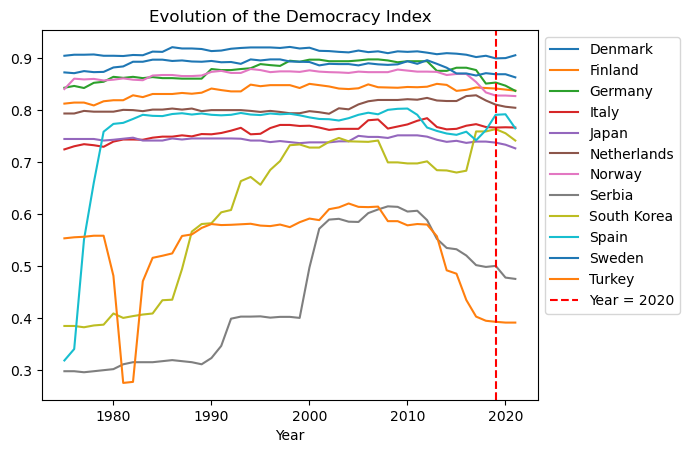

In [28]:
df.set_index('Year',inplace=True)
df.groupby('Country name')['Democracy Score'].plot(x='Year',legend=True)
plt.axvline(x = 2019, color = 'r',ls='--', label = 'Year = 2020')
plt.title('Evolution of the Democracy Index')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()
df.reset_index(inplace=True)

In [29]:
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries = countries.merge(df[df["Year"]==2020][['Country name','Democracy Score']],left_on='name',right_on='Country name', how='left')
countries.drop('Country name', inplace=True, axis=1)

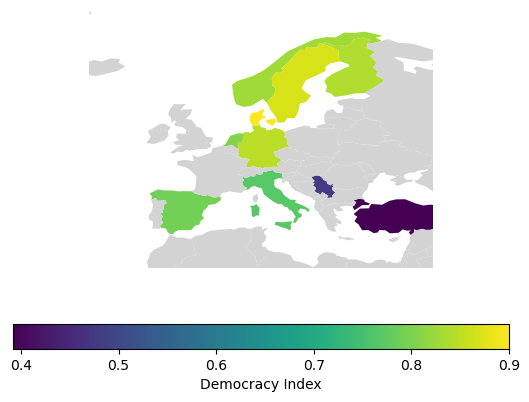

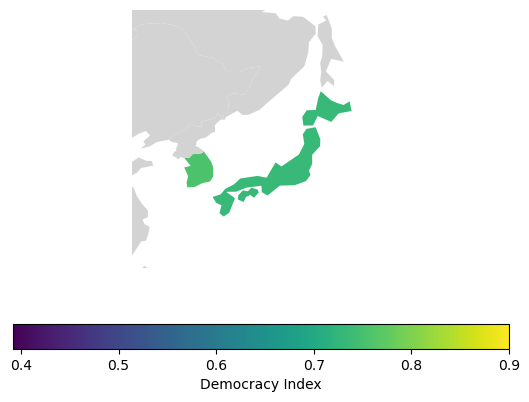

In [30]:
ax1=countries.plot(column='Democracy Score', legend=True,legend_kwds={'label': "Democracy Index",
                        'orientation': "horizontal"}, missing_kwds={'color': 'lightgrey'})
ax2=countries.plot(column='Democracy Score', legend=True,legend_kwds={'label': "Democracy Index",
                        'orientation': "horizontal"}, missing_kwds={'color': 'lightgrey'})
ax1.set_xlim(-20,40)
ax1.set_ylim(30,75)
ax1.set_axis_off()

ax2.set_xlim(120,150)
ax2.set_ylim(25,55)
ax2.set_axis_off()
plt.show()



In [31]:
#Load the (gzipped) json file
with gzip.open(path + 'aggregated_timeseries.json.gz', "rb") as f:
    json_timeseries = json.loads(f.read().decode("ascii"))

In [32]:
wiki_versions =['sv','de','it','sr','no','ko','da','ja','nl','fi','ca','tr']
#Here we want to plot how each topic evolved during the pandemics with respect to the normal
lockdown_start_dic={'sv': 435,'de':435,'it':435,'sr':435,'no':435,'ko':435,'da':435,'ja':435,'nl':435,'fi':435,'ca':435,'tr':435}
for c in wiki_versions:
    # Let's put in the list time the list of the days of the considered period
    time = list(json_timeseries[c]['sum'].keys())
    # We just remove the hours
    time = [t[:10] for t in time]

    # Thanks to the dataframe df_interventions we can get the dates of the lockdown in Italy
    lockdown_start = df_interventions.loc[df_interventions['lang'] == c]['Lockdown'].to_list()
    lockdown_end = df_interventions.loc[df_interventions['lang'] == c]['Normalcy'].to_list()
    start_index=float('nan')
    if (lockdown_start[0]==lockdown_start[0]) :
        # We compute the index of these dates in the list of the days
        start_index = time.index(lockdown_start[0])-365
    lockdown_start_dic[c]=start_index
print(lockdown_start_dic)

{'sv': nan, 'de': 446, 'it': 435, 'sr': 445, 'no': 448, 'ko': nan, 'da': 442, 'ja': nan, 'nl': nan, 'fi': nan, 'ca': 438, 'tr': nan}


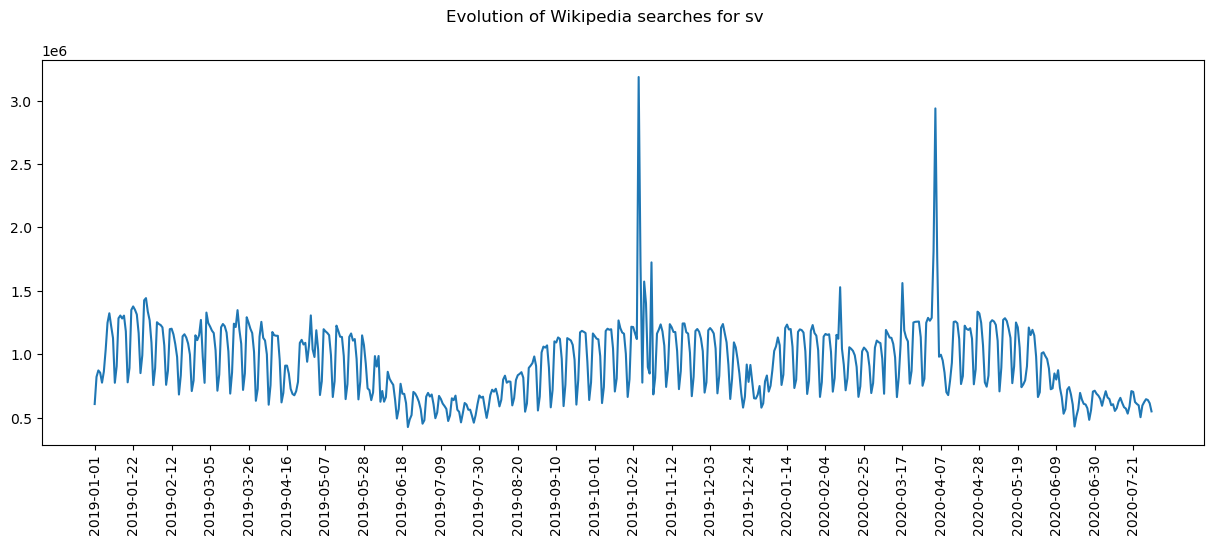

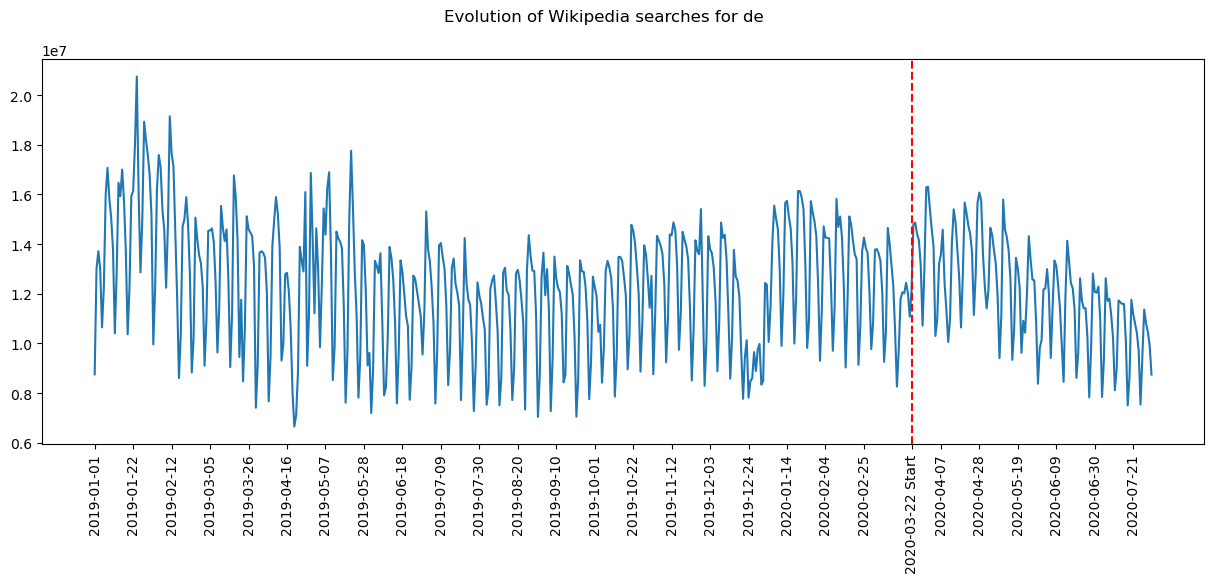

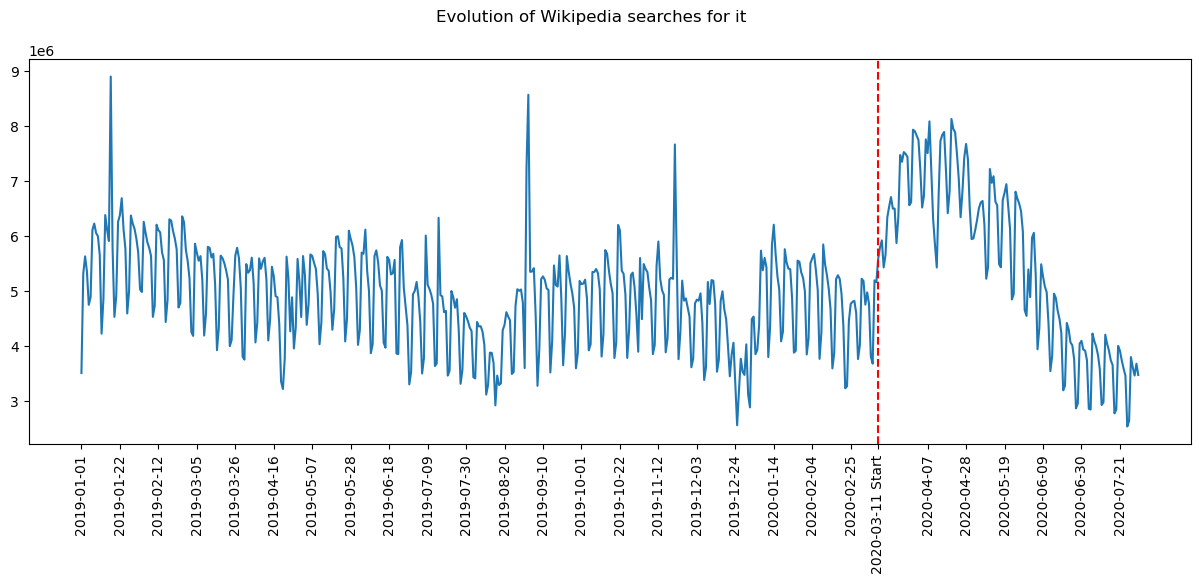

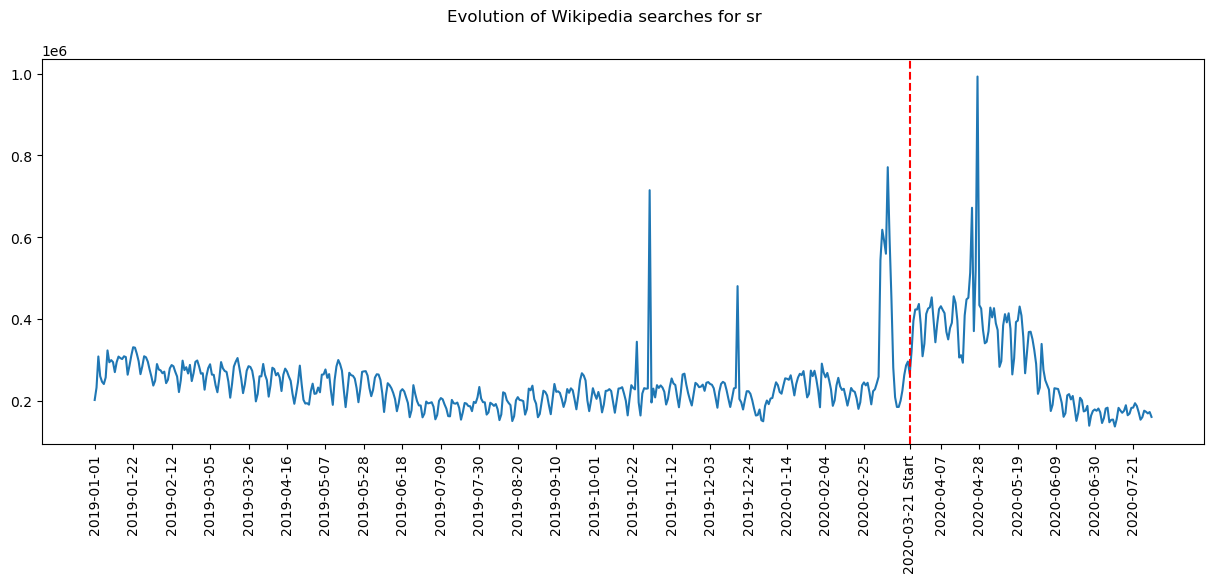

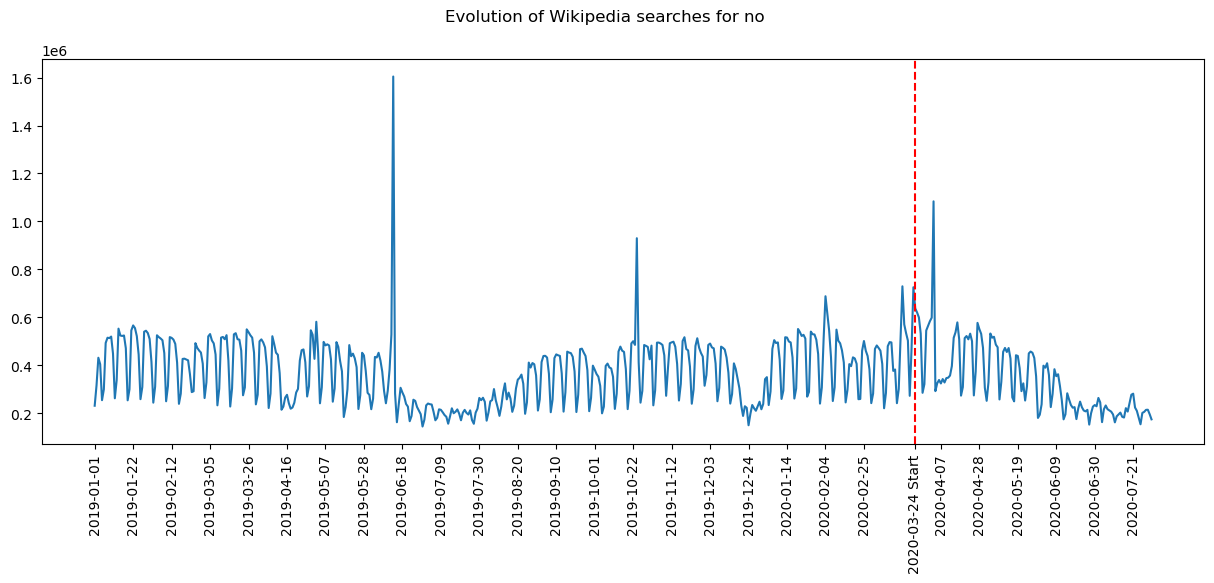

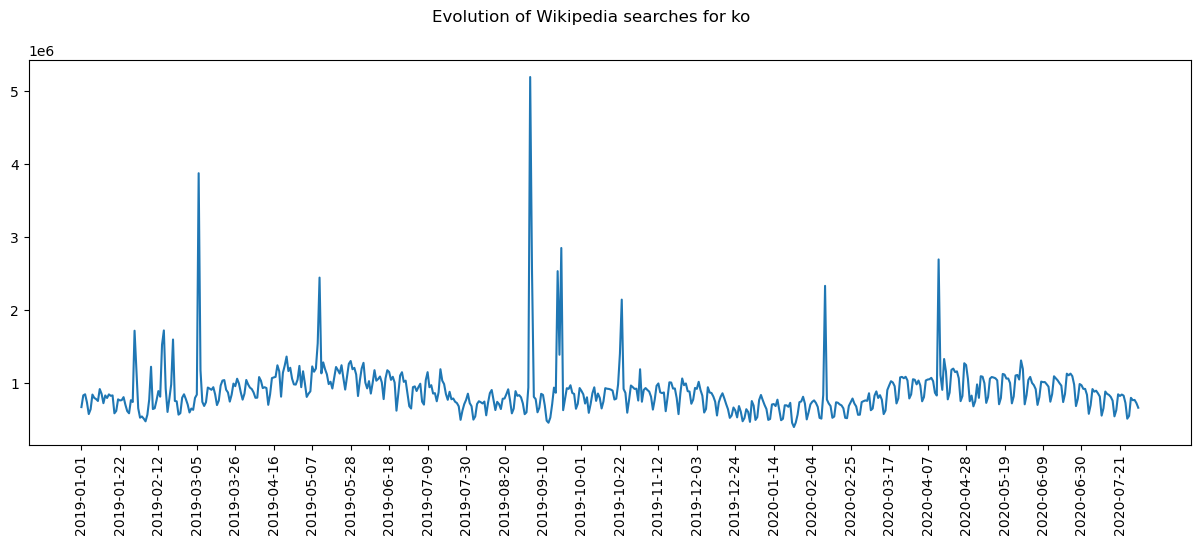

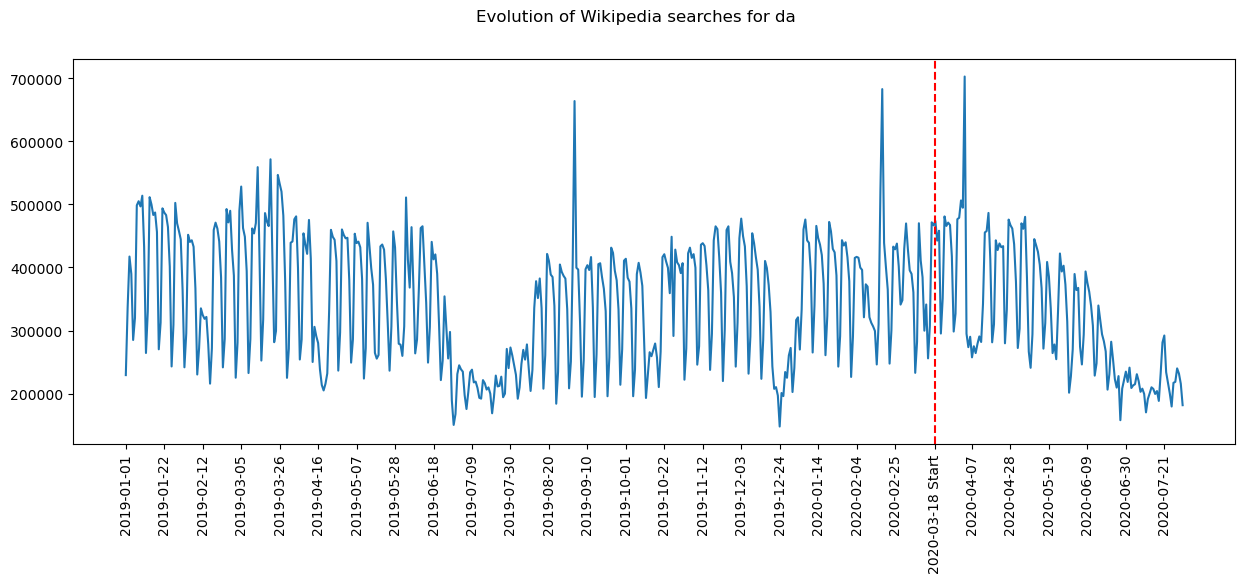

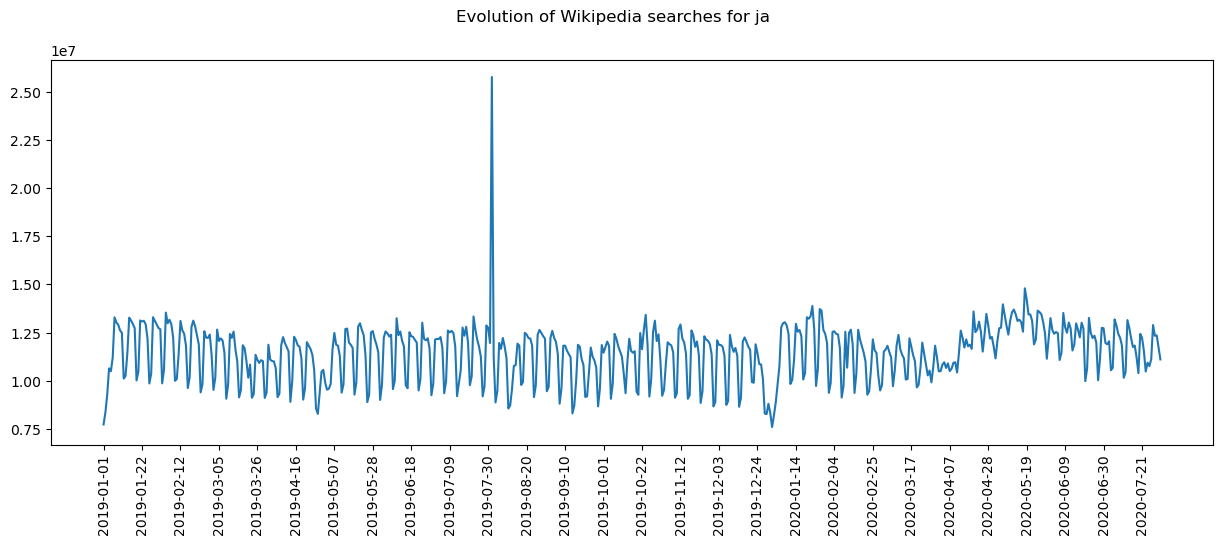

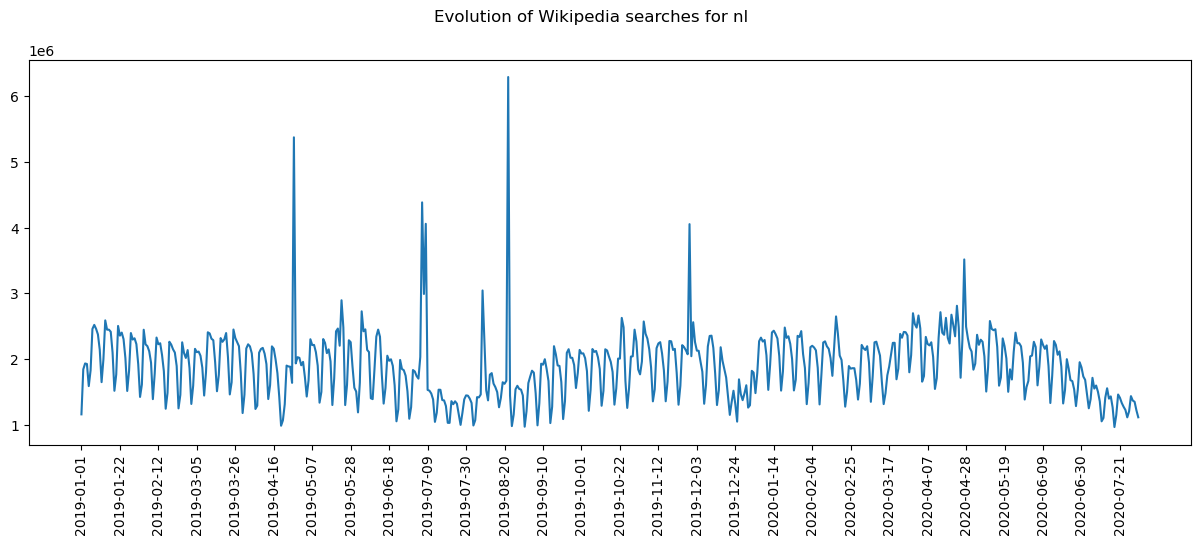

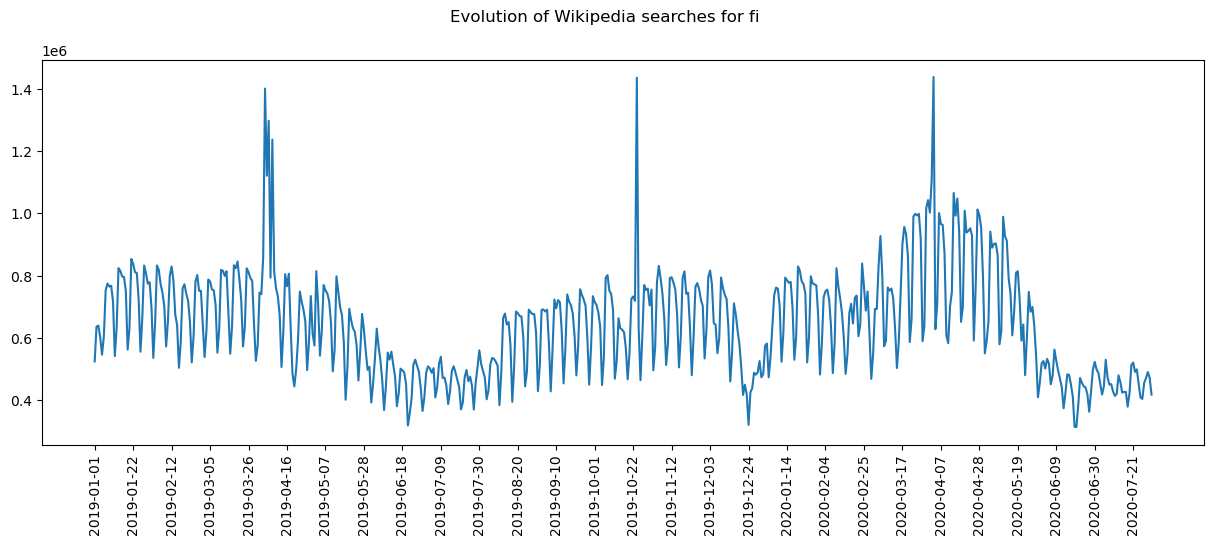

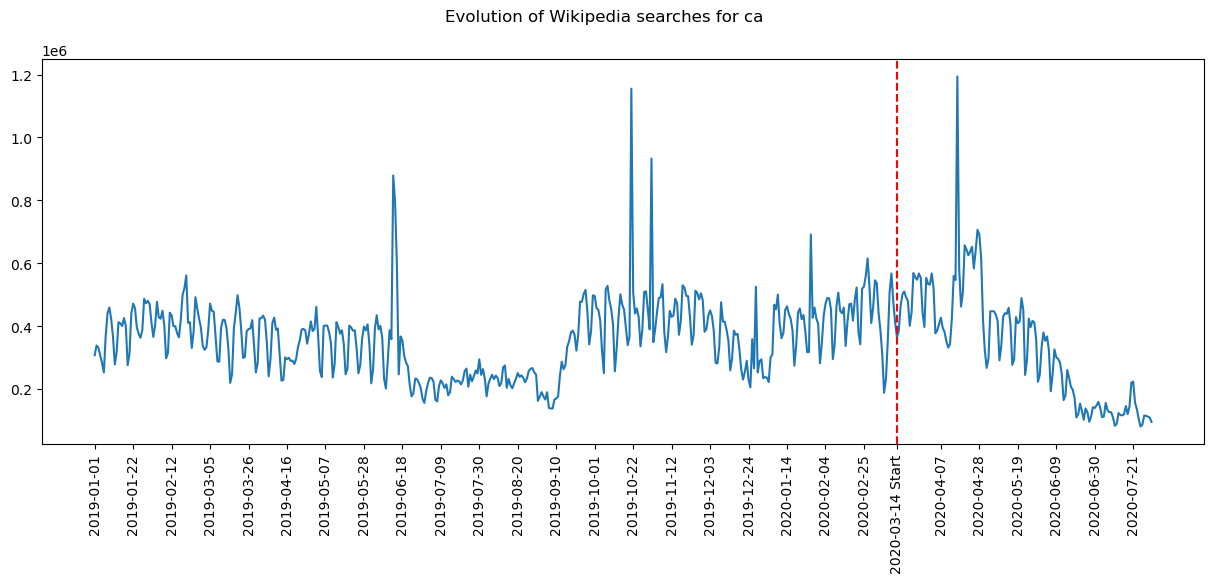

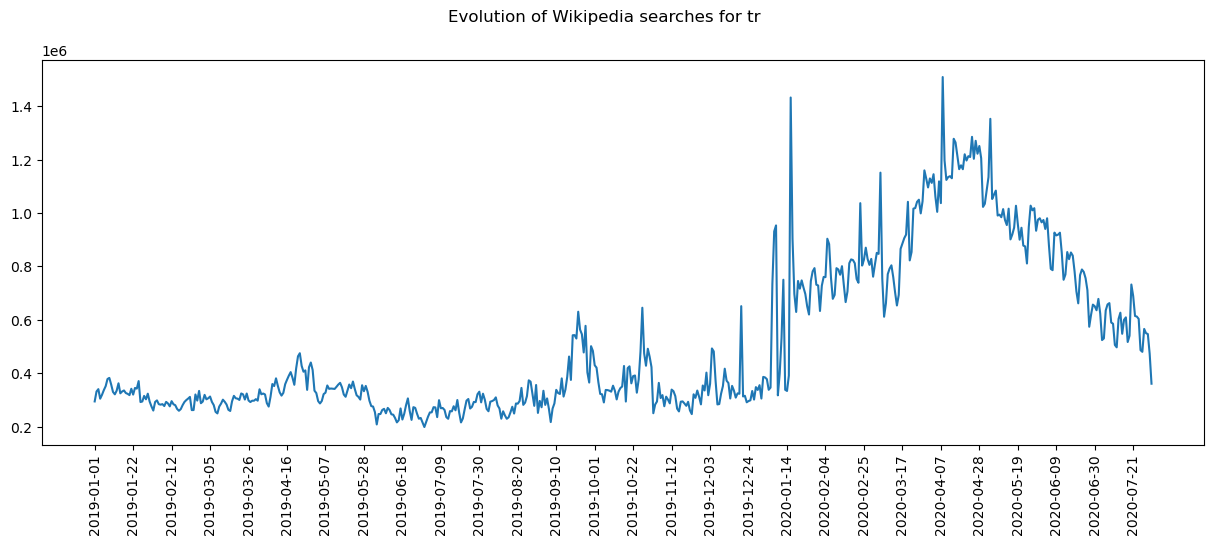

In [51]:
def Wiki_searches(version):
    V=json_timeseries[version]['sum']
    myList = V.items()
    myList = sorted(myList) 
    x, y = zip(*myList) 
    return x[365:],y[365:]


for c in wiki_versions:

    # For the purpose of plotting our results we create a list of days with only 1 day in 21 and we also create a list of index for these days
    time_reduced = [time[21*i+365] for i in range(int(len(time[365:])/21)+1)]
    time_pos = [21*i for i in range(int(len(time[365:])/21)+1)]

    lockdown_start = df_interventions.loc[df_interventions['lang'] == c]['Lockdown'].to_list()
    start_index=float('nan')
    if (lockdown_start[0]==lockdown_start[0]) :
        # We compute the index of these dates in the list of the days
        start_index = time.index(lockdown_start[0])-365
        time_pos.append(start_index)
        time_reduced.append(lockdown_start[0]+' Start')

    # We also remove two points which are too close from the start/end of the lockdown to have a nice plot
        time_pos.pop(time_reduced.index('2020-03-17'))
        time_reduced.pop(time_reduced.index('2020-03-17'))


    fig, ax1 = plt.subplots(figsize=(15,5))
    x,y=Wiki_searches(c)
    ax1.plot(x, y)
    if lockdown_start_dic[c]==lockdown_start_dic[c]:
        ax1.axvline(x = lockdown_start_dic[c], color = 'r',ls='--', label = 'Year = 2020')
    fig.suptitle("Evolution of Wikipedia searches for {version}".format(version=c))
    ax1.set_xticks(time_pos,time_reduced,fontsize=10)
    ax1.tick_params('x',labelrotation=90)
    plt.show()
